In [3]:
import pandas as pd


In [20]:
from ydata_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns
%matplotlib inline

In [100]:
df = pd.read_csv('~/Documents/MSDS_VaishaliWork/MSDS670_DataVisualisation/Week5/bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


# Creating a customized histogram with a density plot

Text(0.5, 1.0, 'Age and Term deposit')

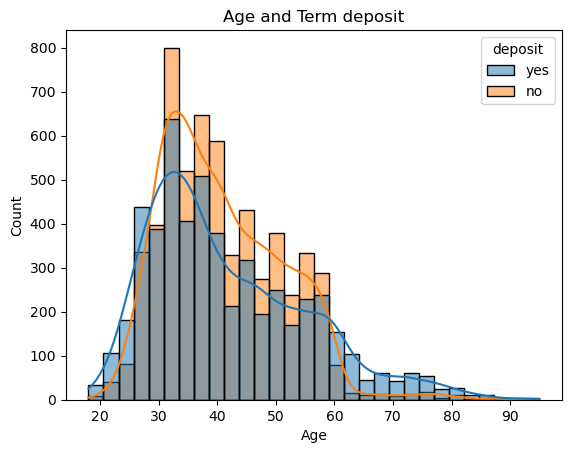

In [43]:

sns.histplot(data=df,x=df['age'],hue='deposit',bins=30, kde = True)
 
# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age and Term deposit')

# Box Plot or Whisker Plot to check outliers

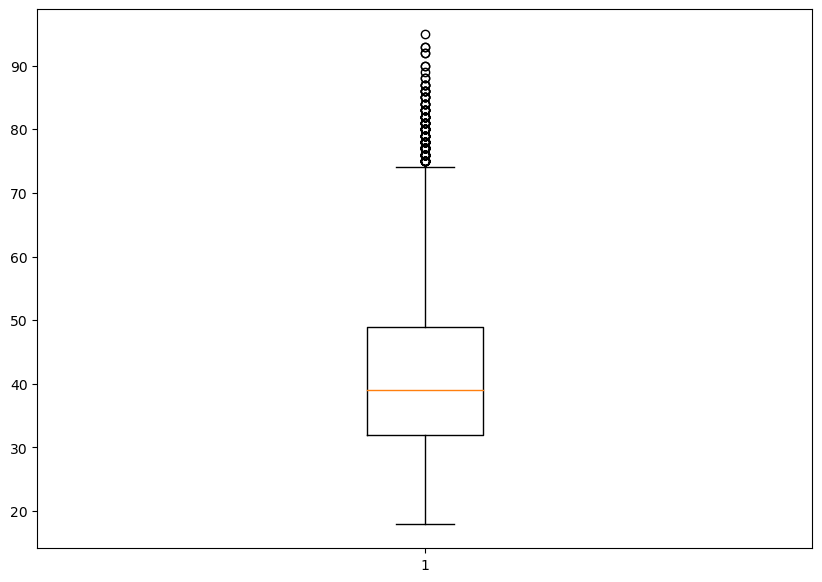

In [83]:
# Outliers for age column

fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(df['age'])
 
# show plot
plt.show()

Some outliers exist after 70 years of age. We can remove these records.

In [84]:
# Keeping only the age less than or equal to 70 to remove the outliers

df = df[df['age'] <= 70]
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


# Comparison of Marital Status, Housing with Loan status

/Users/puneet/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


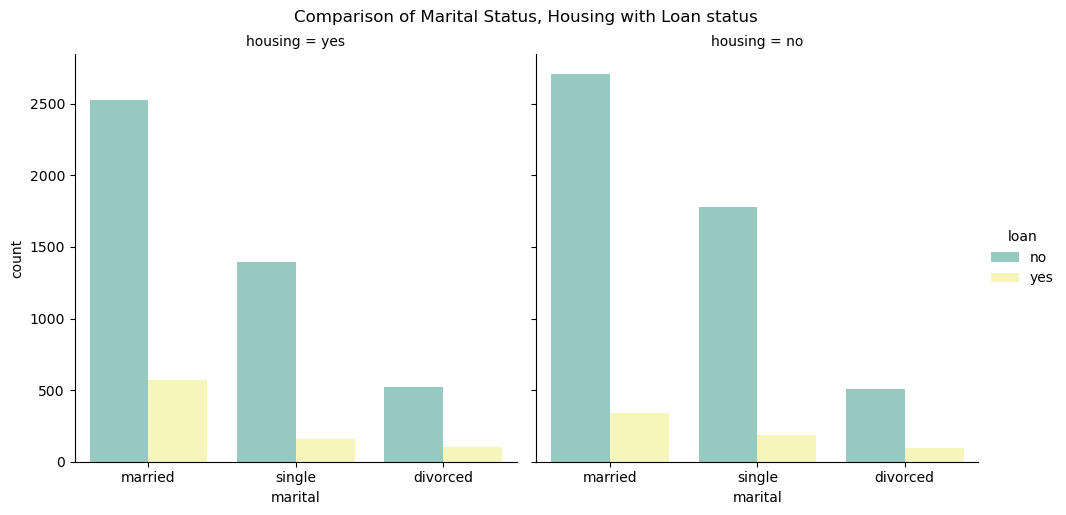

In [86]:
# Bar Graph 

sns.catplot(x='marital', hue='loan', col='housing', data=df, kind='count', palette='Set3', col_wrap=2)
plt.suptitle('Comparison of Marital Status, Housing with Loan status', y=1.02)
plt.show()

# Balance distribution

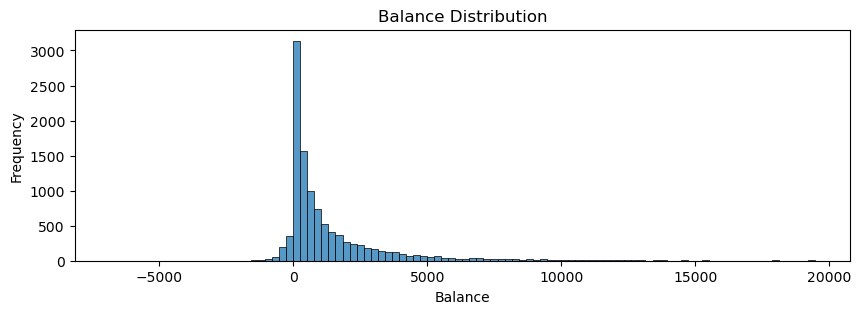

In [78]:
plt.figure(figsize=(10, 3))
sns.histplot(df[df['balance'] < 20000]['balance'], bins=100, kde=False)
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

# Checking distribution of day, duration, campaign, previous and pdays

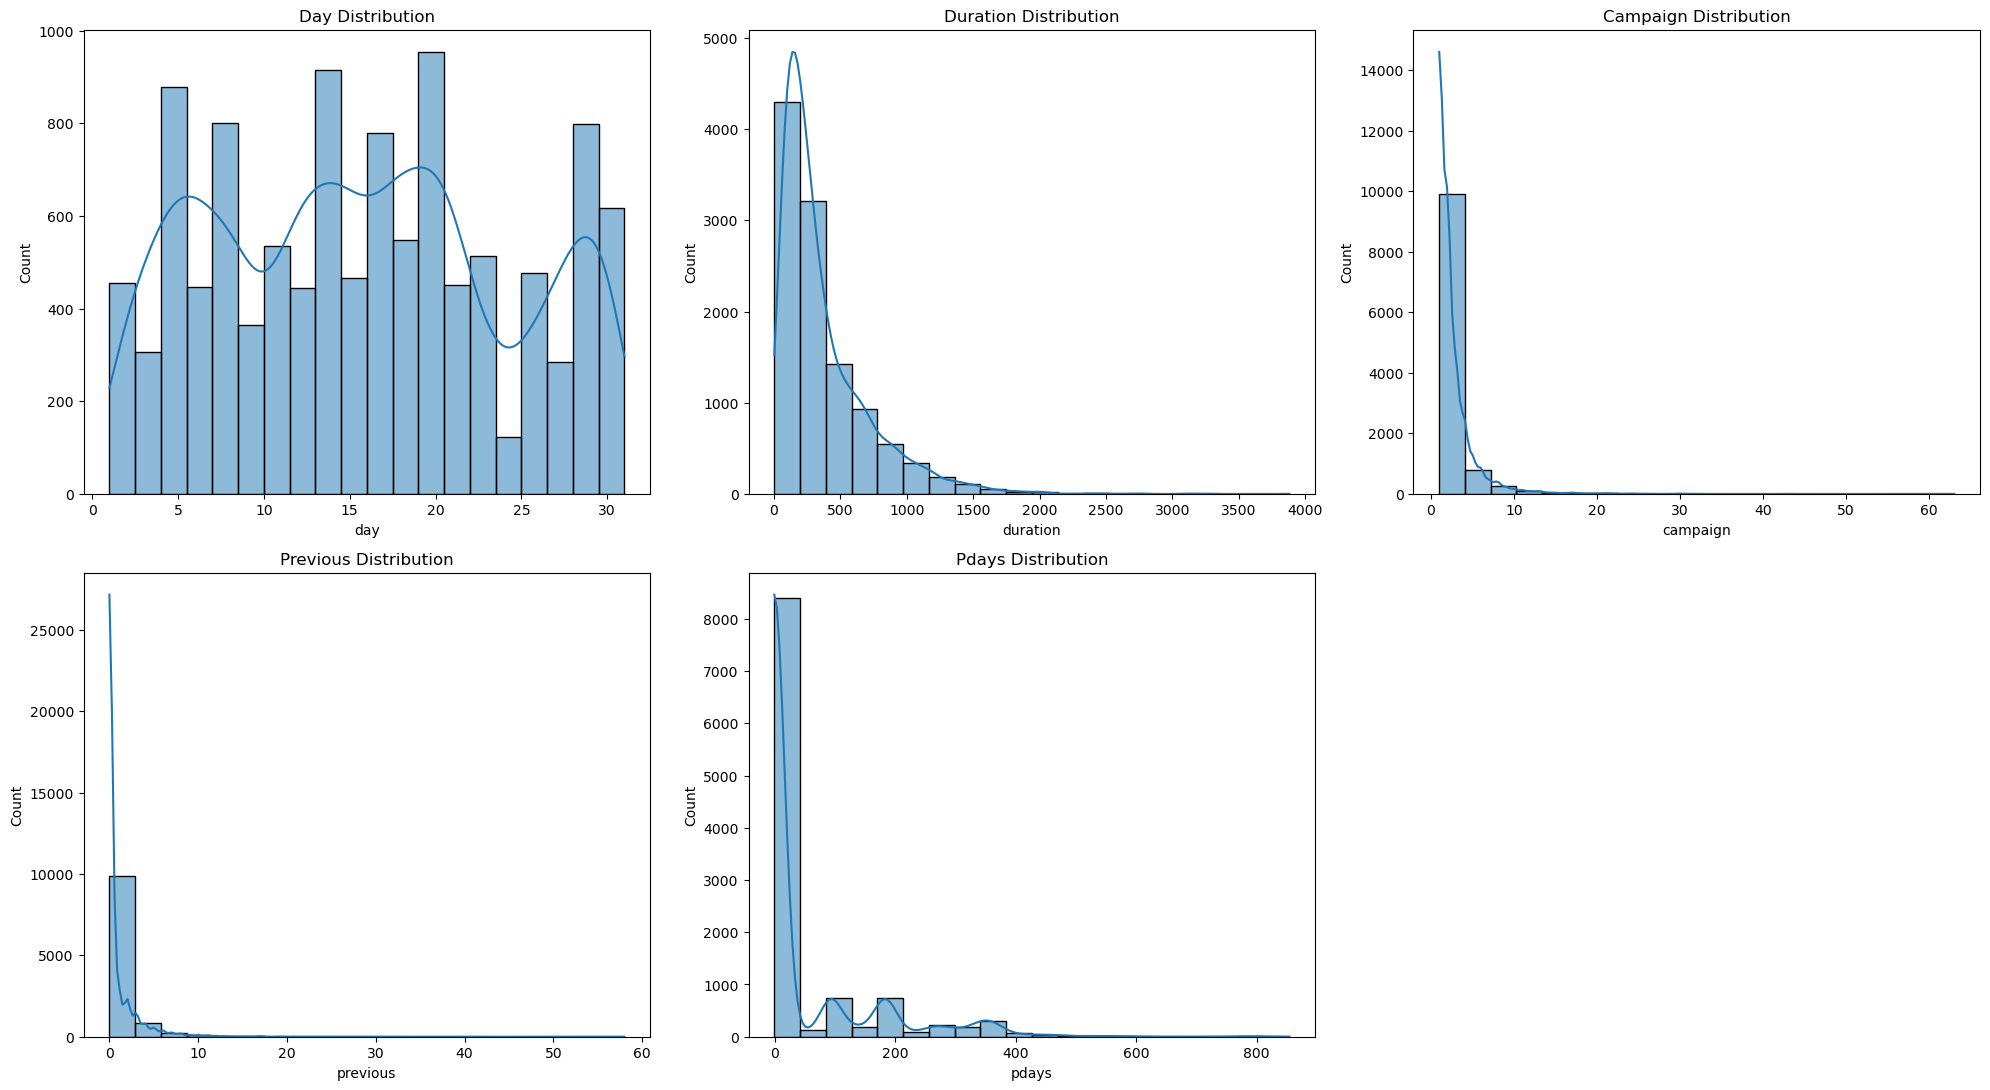

In [51]:
features = ['day', 'duration', 'campaign', 'previous', 'pdays']

plt.figure(figsize=(20, 16))

for i, feature in enumerate(features, start=1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], bins=20, kde=True)
    plt.title(f'{feature.capitalize()} Distribution')

plt.tight_layout()
plt.show()

# Day and duration impact on deposit

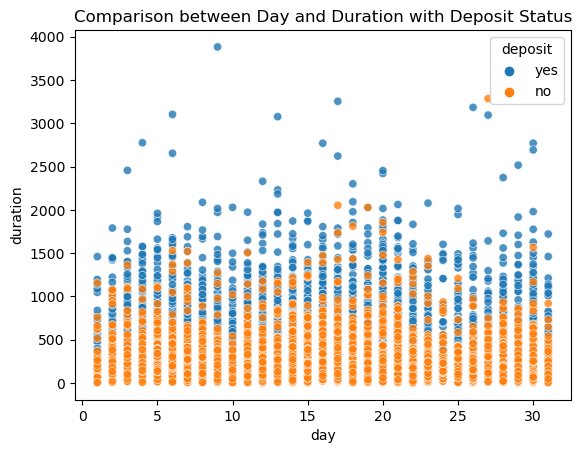

In [53]:
sns.scatterplot(x='day', y='duration', data=df, hue='deposit', alpha=0.8)
plt.title('Comparison between Day and Duration with Deposit Status')
plt.show()

# Previous outcome and deposit as hue

/Users/puneet/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


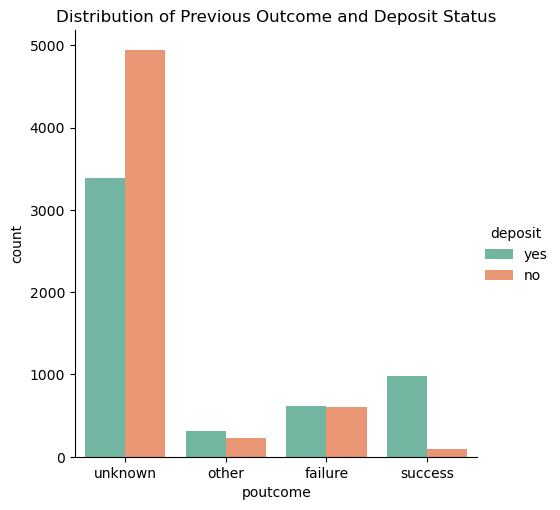

In [68]:
sns.catplot(x='poutcome', hue='deposit', data=df, kind='count', palette='Set2', aspect=1)
plt.title('Distribution of Previous Outcome and Deposit Status')
plt.show()

# Bar Plots for Categorical column "job" with target "termdeposit" as hue

<Axes: xlabel='job'>

<Figure size 1000x600 with 0 Axes>

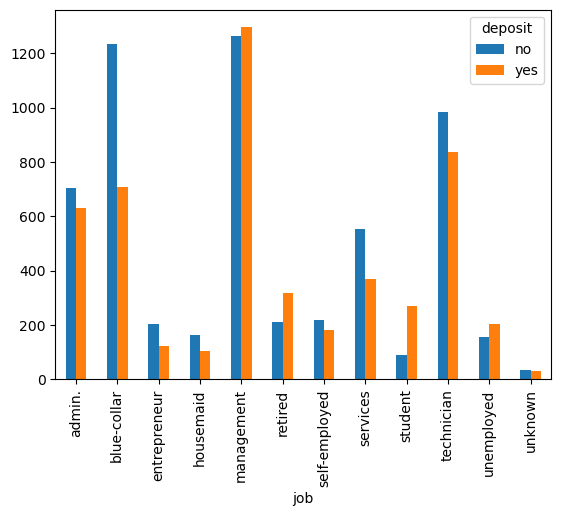

In [80]:
fig = plt.figure(figsize=(10, 6), ) 
pd.crosstab(df['job'],df['deposit']).plot(kind = 'bar')

People in management and technical jobs have subscribed most for the deposits.

# Corelation matrix for numeric columns - heatmap

In [102]:
df_new = df

In [103]:
# dropping categorical columns

drop_col = ['balance','education','job','marital','housing','loan','contact']
df_new.drop(drop_col, axis=1, inplace=True) 

In [105]:
df_new

,age,default,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,no,5,may,1042,1,-1,0,unknown,yes
1,56,no,5,may,1467,1,-1,0,unknown,yes
2,41,no,5,may,1389,1,-1,0,unknown,yes
3,55,no,5,may,579,1,-1,0,unknown,yes
4,54,no,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...
11157,33,no,20,apr,257,1,-1,0,unknown,no
11158,39,no,16,jun,83,4,-1,0,unknown,no
11159,32,no,19,aug,156,2,-1,0,unknown,no
11160,43,no,8,may,9,2,172,5,failure,no


In [112]:
# dropping columns

drop_col = ['deposit']
df_new.drop(drop_col, axis=1, inplace=True) 

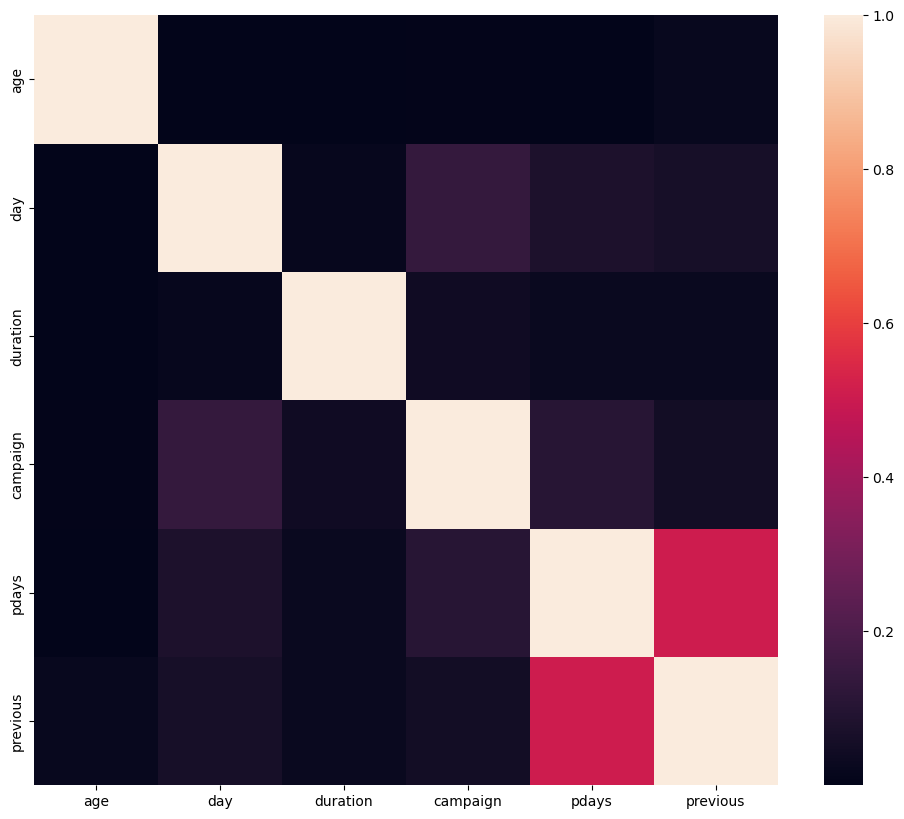

In [113]:
plt.figure(figsize = (12,10))
sns.heatmap(df_new.corr().abs())    # To see the correlations
plt.show()